# Time Series Analysis and Forecasting

### About Time Series analysis
* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [16]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## The Data

<p>We are using Superstore sales data that can be downloaded from <a href = 'https://community.tableau.com/docs/DOC-1236'>here</a>.</p>

In [17]:
# read the excel file
furniture = pd.read_excel("data/Sample - Superstore.xls")
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
furniture.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


## Data Preprocessing

In [19]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

#plot the sales data of furniture
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

C:\Users\olimartin\AppData\Local\Temp\ipykernel_768\963853344.py:10: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [20]:
# Sort the Order Date 
furniture = furniture.sort_values('Order Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

     Order Date   Sales
7980 2014-01-03  16.448


Order Date    0
Sales         0
dtype: int64

In [21]:
# grouping sales according to Order Date
furniture.groupby('Order Date')['Sales'].sum().reset_index()

# min and max values of Order Date
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [22]:
#set 'Order Date' as index
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [23]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

## Data Visualization

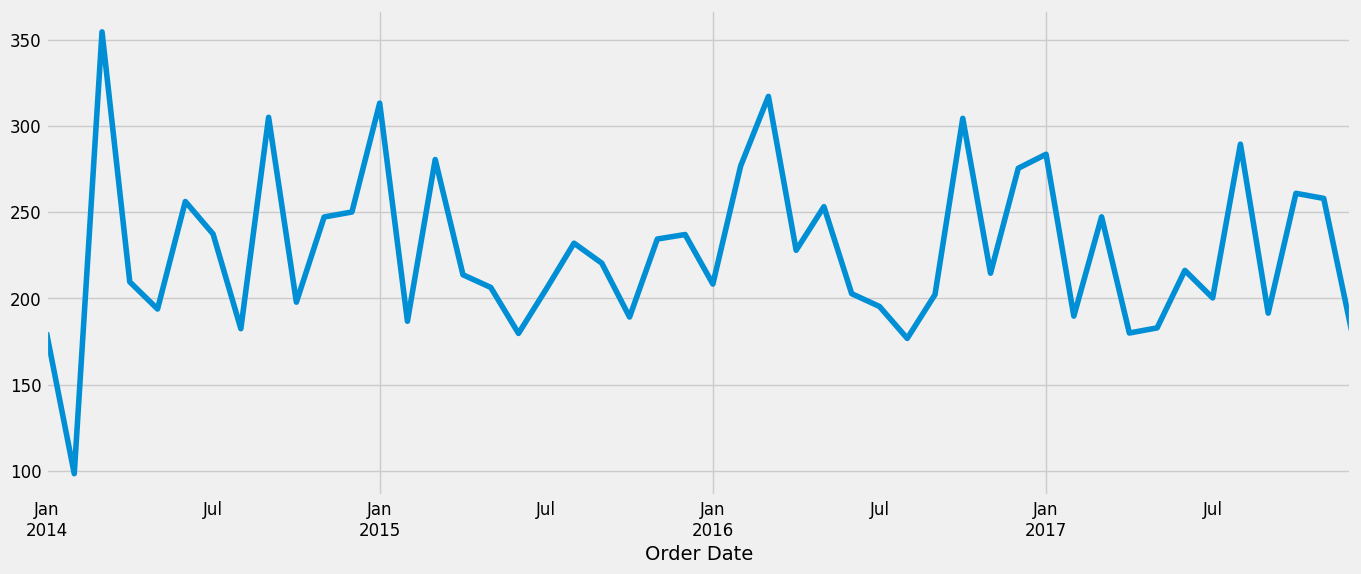

In [24]:
y.plot(figsize = (15, 6))
plt.show()

#### Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


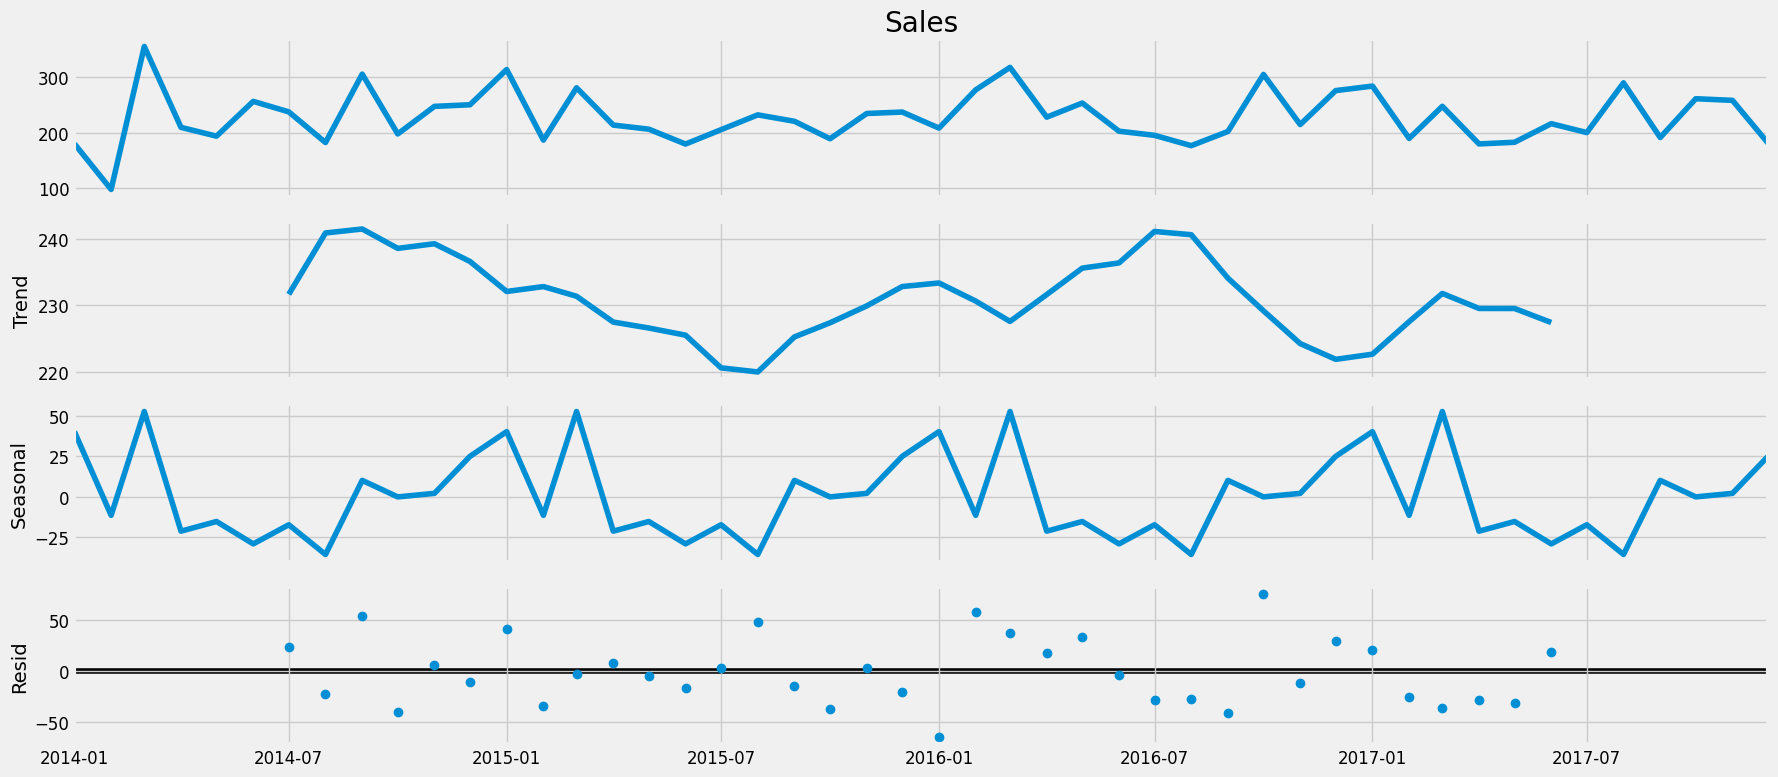

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

In [26]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1926.6294175157695
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.0746678479059
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:396.8202649808117
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131280227
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702897692451
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.7387013652839
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:397.7103607987719
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670648


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\repos\Ti

ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1833.8641259747162
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.05723836321
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:398.3073903083637
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871052451


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.4641112592828
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.26524843857504


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:399.116624509939
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537055


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1975.3348163677656
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987151014
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:411.77118682003714
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055302


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1817.9078469100084
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.1502241600889
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:413.03496187261
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.2494190718198


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1983.2766624739963
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.5664610839726
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:393.23114179460805
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.0099455851308


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2007.828894905605
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.0933287553415
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:394.0906684764191
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.9945048915232


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2415.963939425197
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.0620300756018
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:398.38088151786775
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.9272857949777
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727455


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.2757103427828
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:399.14714147391015


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Ti

ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9335327228462


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2112.181854402472
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.5034128342554
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:397.0752637441923


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.7161726058142
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.6581787692703
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.0818242406199


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:397.9267379165766
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467444


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1970.3759084629935
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.0593708053185
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:402.67176668679986
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414869504


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2102.686947136664
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.8530806572993
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:401.49865810033594
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.5628866933231


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1975.9549334860376
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.5619008071329
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:395.02518862610793
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.52247737023146


c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-package

ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1815.8062716714596
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.8481987643707
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:395.81171398659495


###### Fitting the ARIMA model

In [28]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1391   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


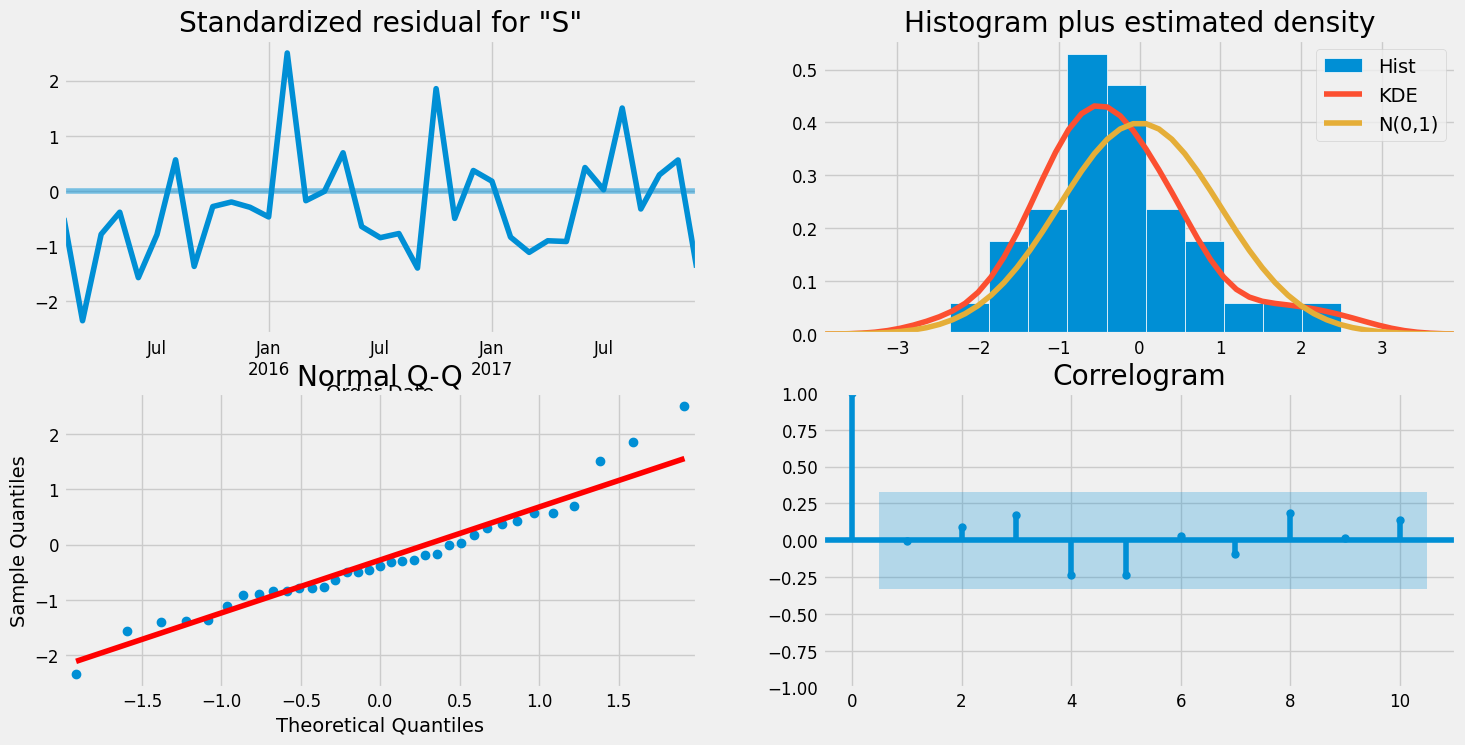

In [29]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

<p>It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.</p>

### Validating Forecasts

<p>
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at <i>2017–01–01</i> to <i>the end of the data.</i>
</p>

In [30]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949835,380.855433
2017-02-01,128.374780,341.873709
2017-03-01,201.126557,414.265410
2017-04-01,122.357194,335.174989
2017-05-01,126.153434,338.683174
2017-06-01,87.013285,299.283135
2017-07-01,92.953021,304.987207
2017-08-01,102.323364,314.142878
2017-09-01,103.098065,314.721213


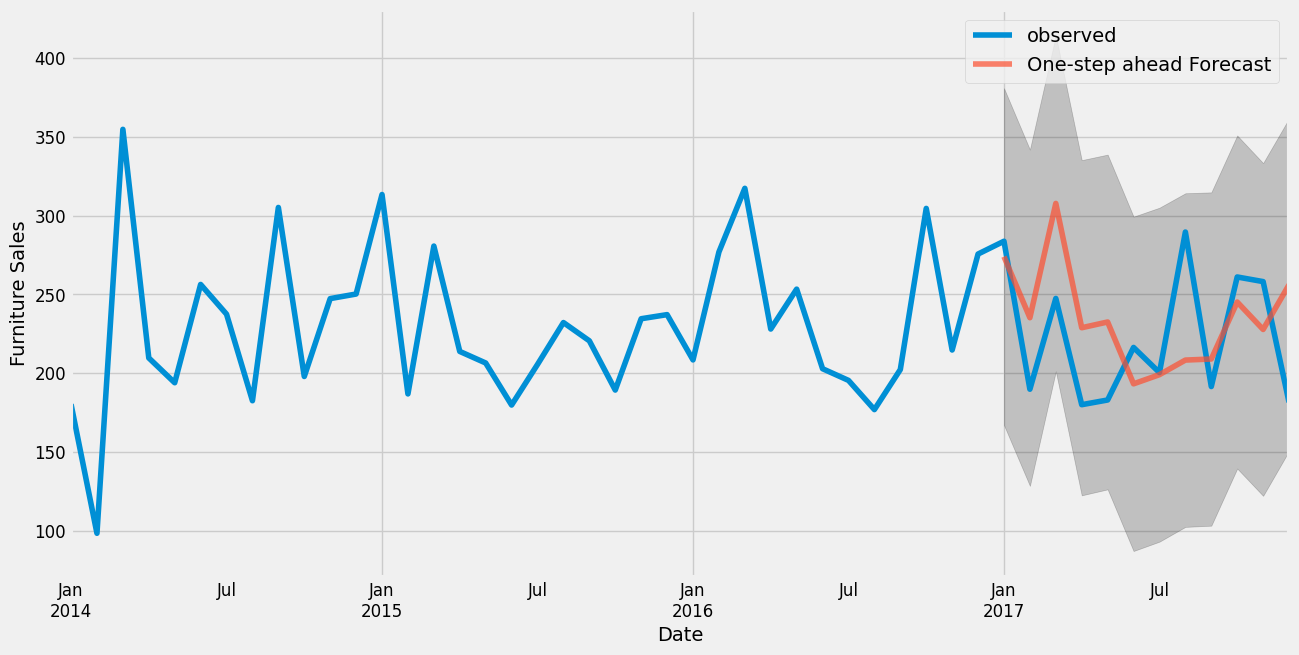

In [31]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

<p>The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.
</p>

### Error Analysis

In [32]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))


The Mean Squared Error of our forecasts is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


##### Producing and visualizing forecasts

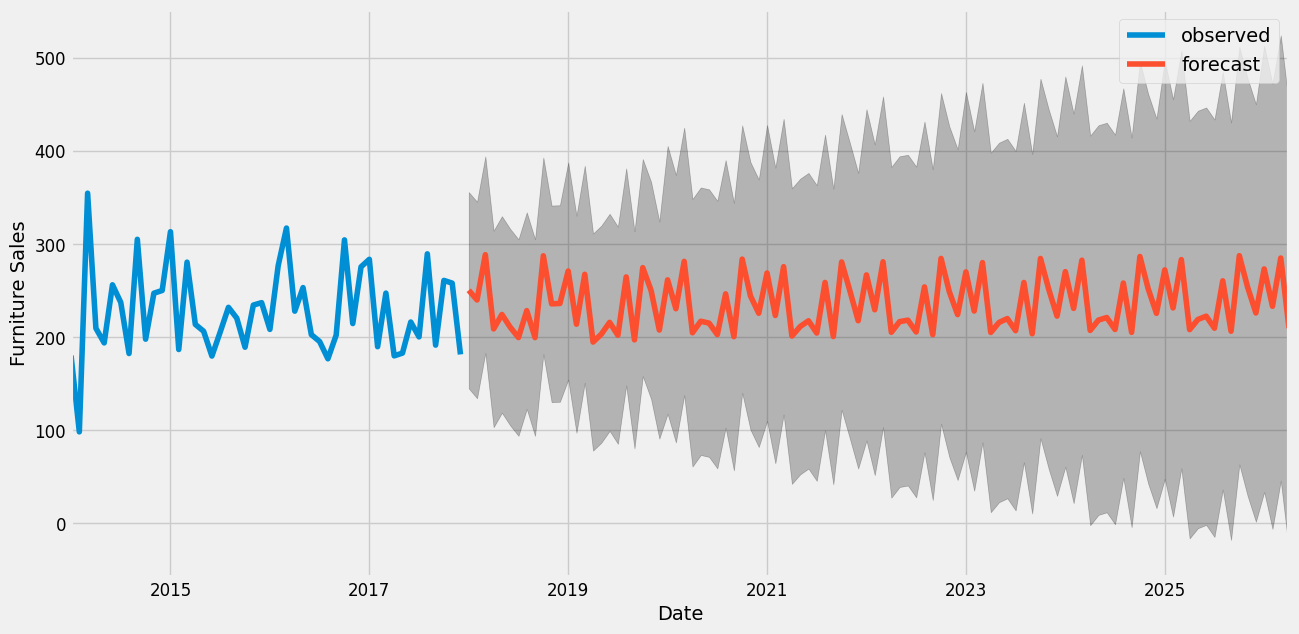

In [34]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

## Summary

<ul>
<li>Our model clearly captured furniture sales seasonality.</li>
<li>As we forecast further out into the future, it is natural for us to become less confident in our values.</li>
<li>This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.</li>

</ul>